<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter2/DSML_Polynomial_Regression_TW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.10.12


# 連接Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path_head = '/content/drive/MyDrive/Colab Notebooks/' # You have to change this.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 範例 2.1
## 匯入模組


In [3]:
import numpy as np
from numpy.random import rand , randn
from numpy.linalg import norm , solve
from scipy.linalg import hilbert # Add Hibert matrix
import matplotlib.pyplot as plt
import scipy
import math
from scipy.special import gamma
print(scipy.__version__)
print(np.__version__)
from matplotlib.font_manager import fontManager
import matplotlib as mpl
# 設定字型的路徑

#fontManager.addfont('/content/drive/MyDrive/Colab Notebooks/kaiu.ttf')
#mpl.rc('font', family='DFKai-sb')

for i in sorted(fontManager.get_font_names()):
  print(i)

fontManager.addfont('/content/drive/MyDrive/Colab Notebooks/NotoSansTC-Regular.ttf')

for i in sorted(fontManager.get_font_names()):
  print(i)

mpl.rc('font', family='Noto Sans TC')
parameters = {"axes.labelsize": 20, "axes.titlesize": 20, "legend.fontsize": 20, "xtick.labelsize": 20, "ytick.labelsize": 20}
plt.rcParams.update(parameters)

1.11.3
1.23.5
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Humor Sans
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeTwoSym
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Humor Sans
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
Noto Sans TC
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeTwoSym
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10


## Define data generator

In [4]:
def generate_data(beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, 4)) @ beta + sig * np.random.randn(n, 1)
   return u, y

## 設定亂數種子

In [5]:
#np.random.seed(1200)
np.random.seed(5)

## 生成圖2.4

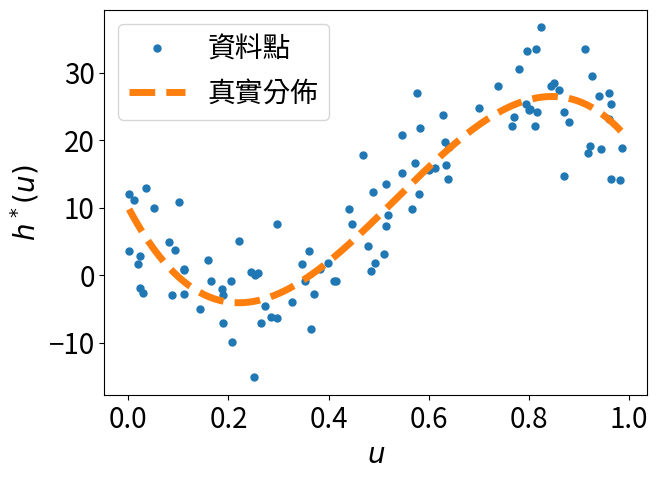

In [6]:
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(beta , sig, n)
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
fig = plt.figure()
fig.set_size_inches(7, 5)

plt.plot(u, y, '.', markersize=10)
plt.plot(xx, yy, '--',linewidth=5)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^*(u)$')
plt.legend(['資料點','真實分佈'])
plt.savefig('polydatpy.pdf',format='pdf', bbox_inches='tight')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## 生成圖2.6

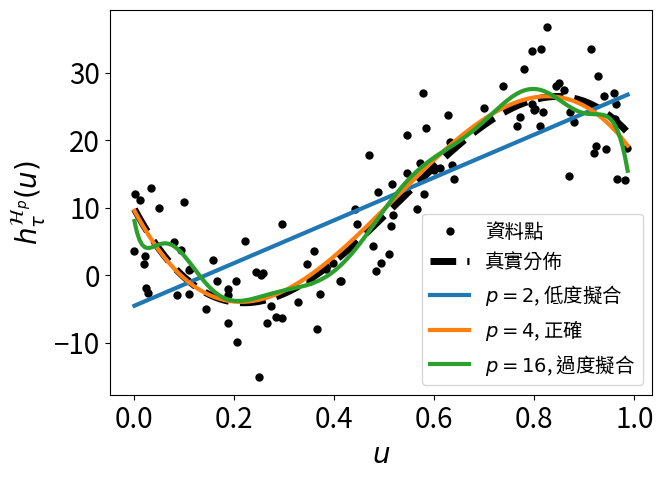

In [7]:
max_p = 18 # More than 16 may get singular matrix
p_range = np.arange(1, max_p + 1, 1)
X = np.ones((n, 1))
#betahat, trainloss = {}, {}
betahat = {}
trainloss = []
for p in p_range:  # p is the number of parameters
    if p > 1:
        X = np.hstack((X, u**(p-1)))  # add column to matrix

    betahat[p] = solve(X.T @ X, X.T @ y)
    #trainloss[p] = (norm(y - X @ betahat[p])**2/n)
    trainloss.append((norm(y - X @ betahat[p])**2/n))

p = [2, 4, 16]  # select three curves

fig = plt.figure()
fig.set_size_inches(7, 5)

#replot the points and true line and store in the list "plots"
plots = [plt.plot(u, y, 'k.', markersize=10)[0],
         plt.plot(xx, yy, 'k--',linewidth=5)[0]]
# add the three curves
for i in p:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy, linewidth=3)[0])

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^{\mathcal{H}_p}_{\tau}(u)$')
plt.legend(plots,('資料點', '真實分佈','$p=2$, 低度擬合',
                  '$p=4$, 正確','$p=16$, 過度擬合','d'), fontsize=14)
plt.savefig('polyfitpy.pdf',format='pdf', bbox_inches='tight')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Reproduce Training loss

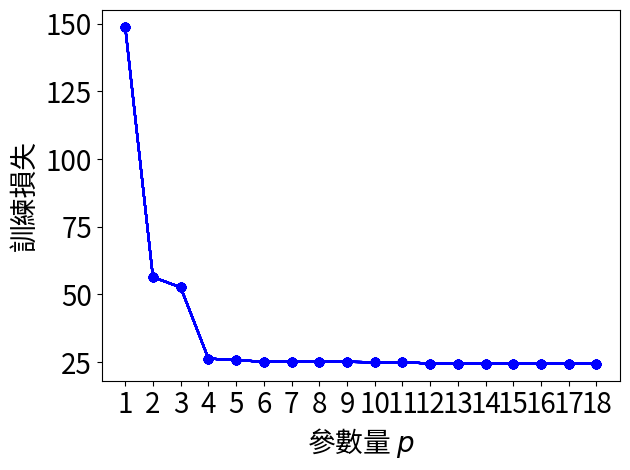

In [8]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for p in p_range:  # p is the number of parameters
  plt.plot(p_range, trainloss, 'b', p_range, trainloss, 'bo-')
plt.xticks(ticks=p_range)
plt.xlabel('參數量 $p$')
plt.ylabel('訓練損失')
plt.tight_layout()
plt.savefig('MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Reproduce Figure 2.7

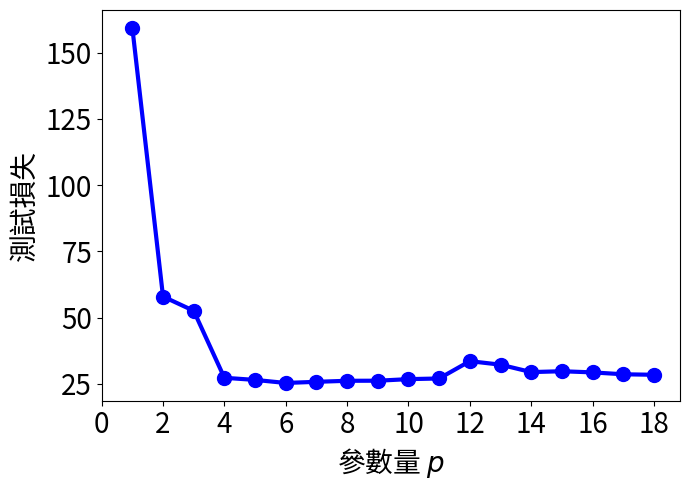

In [9]:
# generate test data
u_test, y_test = generate_data(beta, sig, n)

MSE = []
X_test = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X_test = np.hstack((X_test, u_test**(p-1)))

    y_hat = X_test @ betahat[p]  # predictions
    MSE.append(np.sum((y_test - y_hat)**2/n))

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()
fig.set_size_inches(7, 5)
plt.plot(p_range, MSE, 'bo-', label = 'test loss', markersize=10, linewidth=3)
#plt.plot(p_range, trainloss, 'ro-')
plt.xticks(np.arange(0, 18.1, step=2))
plt.xlabel('參數量 $p$')
plt.ylabel('測試損失')
plt.tight_layout()
plt.savefig('MSEpy_test.pdf',format='pdf', bbox_inches='tight')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Approximation error of Example 2.2, reproduce Equation 2.19


In [10]:
aproxloss = []
irredu_loss = []
beta_B = {}
H = hilbert(4)
H7 = hilbert(7)
h_l = H7[0:7, 0]
print(h_l)
for p in p_range:
  irredu_loss.append(sig*sig)
  if p >= 1 and p <= 3 :
    hb = H[0:p, :].dot(beta)
    beta_best = solve(hilbert(p), hb)
    kk = p
    beta_long=np.pad(beta_best,((0,4-p),(0,0)),'constant', constant_values=(0,0))
    beta_diff = (beta_long-beta).reshape(4,)
    risk_app = np.dot(np.polymul(beta_diff,beta_diff),h_l)
    aproxloss.append(risk_app)
    beta_B[p] = beta_best  #np.pad(beta_best,((0,p-1),(0,0)),'constant', constant_values=(0,0))
  else :
    aproxloss.append(0)
    beta_B[p] = np.pad(beta,((0,p-4),(0,0)),'constant', constant_values=(0,0))
print(aproxloss)

[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714]
[127.87698412698956, 25.79365079366835, 22.32142857143117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Reproduce statistical error of Example 2.2

In [11]:
stat_loss = []
beta_diff = {}

for p in p_range:
  beta_diff[p] = betahat[p] - beta_B[p]
  sloss = hilbert(p)@beta_diff[p]
  ss = beta_diff[p].T @ sloss
  stat_loss.append(ss[0][0])


## 生成圖2.8

<ipython-input-12-b2eaa2882921>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  line2 = plt.plot(p_range, aproxloss, 'bo-', label = '近似誤差', markersize=10,linewidth=3, linestyle=':')


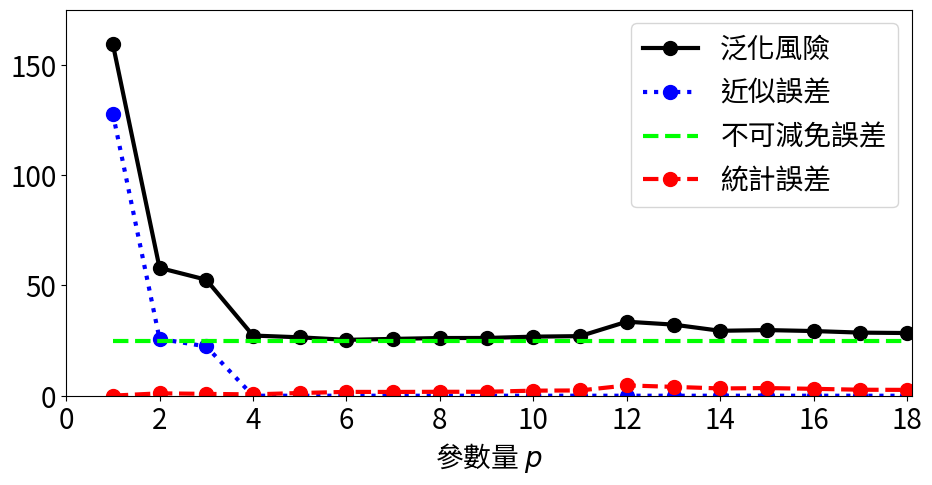

[159.36263201965863, 57.93509387855948, 52.5584867323742, 27.274957175650364, 26.470617410376427, 25.320986214305446, 25.753704352099003, 26.14365453953938, 26.169670385917836, 26.76662890835003, 27.01068749378171, 33.54665789395974, 32.22366173179448, 29.421951851547046, 29.74655966647568, 29.30986678381776, 28.59742996084119, 28.408166442385017]
[127.87698412698956, 25.79365079366835, 22.32142857143117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
[0.04192936054435429, 1.0813770145124235, 0.8330333495423262, 0.6086135479192698, 1.2279159101788384, 1.7397787222826864, 1.7131014142327246, 1.7784784588222635, 1.795166620844924, 2.297816769903875, 2.3893514527480875, 4.678384656202979, 4.014396067534108, 3.2928770962171257, 3.4751810836605728, 3.1244430113583803, 2.7150552815874107, 2.642945976491319]


In [12]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()
line1 = plt.plot(p_range, MSE, 'ko-', label = '泛化風險', markersize=10,linewidth=3)
line2 = plt.plot(p_range, aproxloss, 'bo-', label = '近似誤差', markersize=10,linewidth=3, linestyle=':')
line3 = plt.plot(p_range, irredu_loss, 'lime', label = '不可減免誤差', markersize=10,linewidth=3, linestyle='--')
line4 = plt.plot(p_range, stat_loss, 'ro--', label = '統計誤差', markersize=10,linewidth=3)
plt.legend()
plt.xticks(ticks=p_range)
plt.xlabel('參數量 $p$')
plt.xticks(np.arange(0, 18.1, step=2))
plt.yticks(np.arange(0, 160, step=50))
plt.xlim(0,18.1)
plt.ylim(0,175)
plt.tight_layout()
fig.set_size_inches(10, 5)
plt.savefig('errordecomp.pdf',format='pdf', bbox_inches='tight')
plt.show()
print(MSE)
print(aproxloss)
print(irredu_loss)
print(stat_loss)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## 生成圖2.9

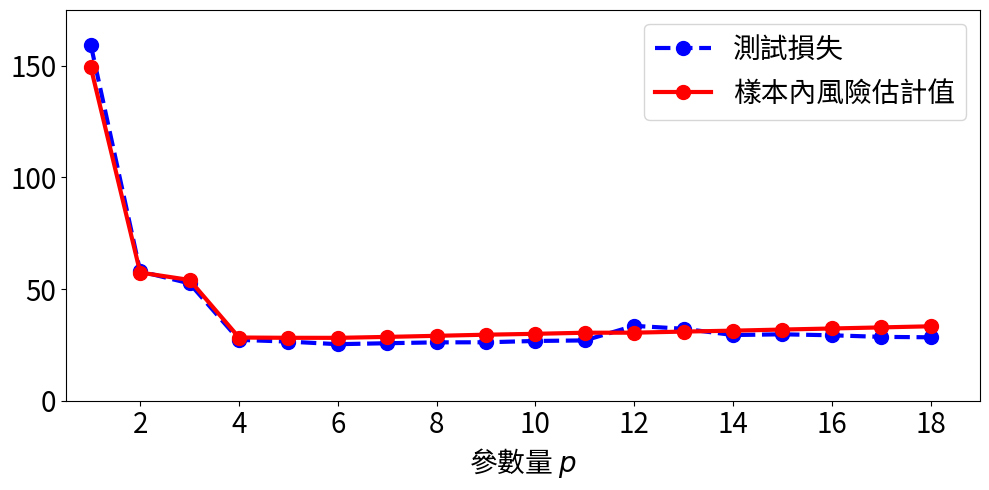

In [13]:
inSampleRisk = []
for p in p_range:
  inSampleRisk.append(2*sig*sig*p/n+trainloss[p-1])

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()
line1 = plt.plot(p_range, MSE, 'bo--', label = '測試損失', markersize=10,linewidth=3)
line2 = plt.plot(p_range, inSampleRisk, 'ro-', label = '樣本內風險估計值', markersize=10,linewidth=3)
plt.legend()
plt.xticks(ticks=p_range)
plt.xlabel('參數量 $p$')
#plt.ylabel('測試損失')
plt.xticks(np.arange(0, 18.1, step=2))
plt.yticks(np.arange(0, 160, step=50))
plt.ylim(0,175)
plt.xlim(0.5,19)
fig.set_size_inches(10, 5)
plt.tight_layout()
plt.savefig('InSampleRisk.pdf',format='pdf', bbox_inches='tight')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## CV

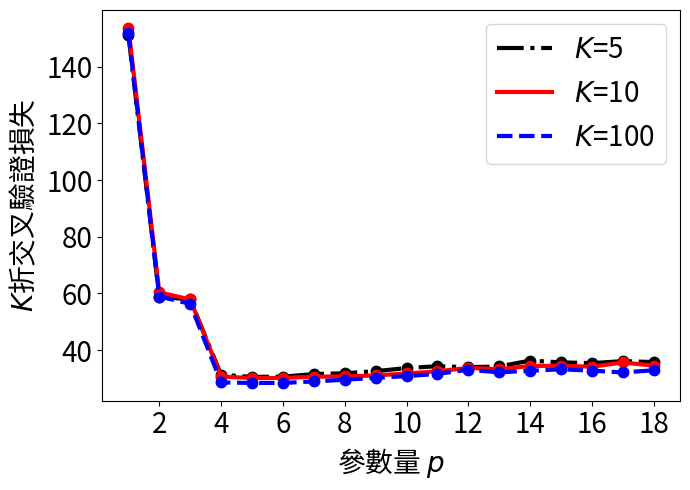

In [14]:
K_vals = [5, 10, 100]  # number of folds
cv = np.zeros((len(K_vals), max_p))
X = np.ones((n, 1))
for p in p_range:
    if p > 1:
        X = np.hstack((X, u**(p-1)))
    j = 0
    for K in K_vals:
        loss = []
        for k in range(1, K+1):
            # integer indices of test samples
            test_ind = ((n/K)*(k-1) + np.arange(1, n/K + 1) - 1).astype('int')
            train_ind = np.setdiff1d(np.arange(n), test_ind)

            X_train, y_train = X[train_ind, :], y[train_ind, :]
            X_test, y_test = X[test_ind, :], y[test_ind]

            # fit model and evaluate test loss
            betahat = solve(X_train.T @ X_train, X_train.T @ y_train)
            loss.append(norm(y_test - X_test @ betahat) ** 2)

        cv[j, p-1] = sum(loss) / n
        j += 1

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()
p1 = plt.plot(p_range, cv[0, :], 'k-.', p_range, cv[0, :], 'k.', markersize=15,linewidth=3)[0]
p2 = plt.plot(p_range, cv[1, :], 'r', p_range, cv[1, :], 'r.', markersize=15,linewidth=3)[0]
p3 = plt.plot(p_range, cv[2, :], 'b--', p_range, cv[2, :], 'b.', markersize=15,linewidth=3)[0]
plt.xticks(range(2, 19, 2))
plt.xlabel('參數量 $p$')
plt.ylabel('$K$折交叉驗證損失')
fig.set_size_inches(7, 5)
plt.legend((p1,p2,p3),('$K$=5','$K$=10','$K$=100'))
plt.tight_layout()
plt.savefig('crossvalpy.pdf',format='pdf', bbox_inches='tight')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Reproduce Figure 2.15

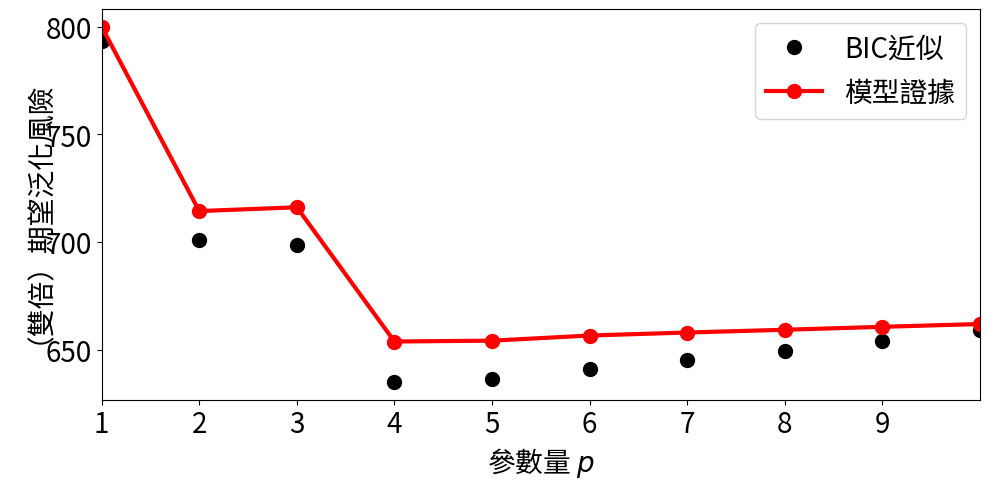

In [15]:
XtX = X.T @ X
model_evi2 = []
BIC_appr = []
SSigma_p = {}
ssigma_p = {}
p = 10
for p in p_range:
  D = np.identity(p) * 10**4
  XtX_p = XtX[0:p,0:p]
  SSigma = np.linalg.inv(XtX_p + np.linalg.inv(D))
  SSigma_p[p]=SSigma
  betaBB = X.T@y
  betaBB = SSigma @ betaBB[0:p]
  ssigma = SSigma @ X.T[0:p,:]
  ssigma = X[:,0:p] @ ssigma
  ssigma = y.T @ (np.identity(n) - ssigma)
  ssigma = ssigma @ y
  ssigma = ssigma[0][0] / (n+p+2)
  ssigma_p[p]=ssigma
  BIC = n * (np.log(2 * math.pi * ssigma) + 1) + (p+1)* np.log(n) + (p+2)
  model2 = n * (np.log(math.pi*(n+p+2)*ssigma)) - 2*np.log(gamma(n/2))+np.log(np.linalg.det(D))-np.log(np.linalg.det(SSigma))
  BIC_appr.append(BIC)
  model_evi2.append(model2)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()
fig.set_size_inches(10, 5)
line_BIC = plt.plot(p_range, BIC_appr, 'ko', label = 'BIC近似', markersize=10)
line_model2 = plt.plot(p_range, model_evi2, 'ro-', label = '模型證據', markersize=10,linewidth=3)
plt.legend()
plt.xticks(range(1, 10, 1))
plt.xlim(1,10)
plt.xlabel('參數量 $p$')
plt.ylabel('（雙倍）期望泛化風險')
plt.tight_layout()
plt.savefig('BayesianModelSelection2.pdf',format='pdf', bbox_inches='tight')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Reproduce Figure 2.16

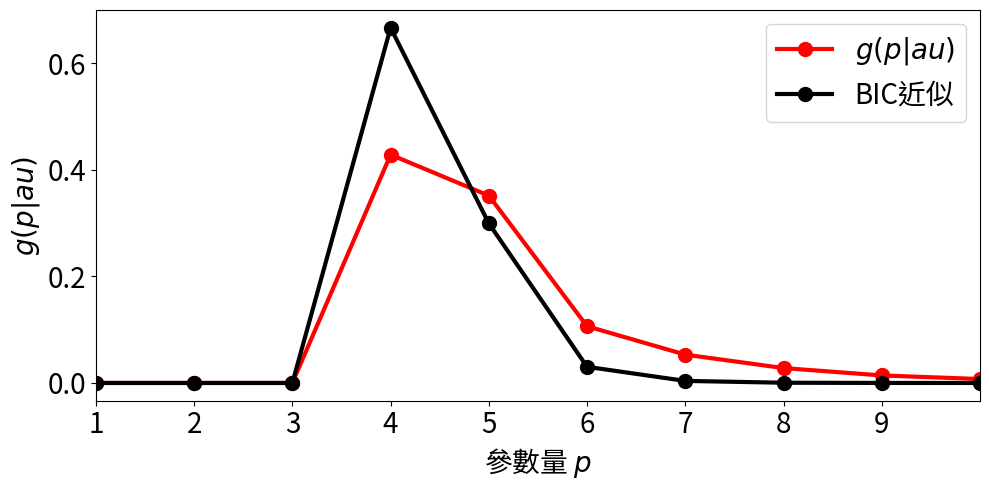

In [18]:
posterior = []
posterior_est = []
pos_sum = 0

for p in p_range:
  pos = math.sqrt(np.linalg.det(SSigma_p[p]))*gamma(n/2)/math.sqrt(np.linalg.det(np.identity(p)*10**4))/(math.pi*(n+p+2)*ssigma_p[p])**(n/2)
  pos_est = math.exp(BIC_appr[p-1]*(-0.5))
  posterior.append(pos)
  posterior_est.append(pos_est)
  pos_sum = pos_sum + pos_est
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()
fig.set_size_inches(10, 5)

for p in p_range:
  posterior_est[p-1] = posterior_est[p-1]/pos_sum
posterior = posterior / sum(posterior)
line_pos = plt.plot(p_range, posterior, 'ro-', label = '$g(p\gvn\tau)$', markersize=10,linewidth=3)
line_pos_est = plt.plot(p_range, posterior_est, 'ko-', label = 'BIC近似', markersize=10,linewidth=3)
plt.legend()
plt.xticks(ticks=p_range)
plt.xticks(range(1, 10, 1))
plt.xlim(1,10)
plt.xlabel('參數量 $p$')
plt.ylabel('$g(p\gvn\tau)$')
plt.tight_layout()
plt.savefig('BayesianModelSelection.pdf',format='pdf', bbox_inches='tight')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

